In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ticker='AAPL'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-3-21')['Adj Close']

In [6]:
log_returns = np.log(1+data.pct_change())

In [7]:
r=0.025

In [8]:
stdev = log_returns.std()*250**0.5
stdev

AAPL    0.324357
dtype: float64

In [9]:
stdev = stdev.values
stdev

array([0.32435692])

In [11]:
T=1.0
t_intervals=250
delta_t = T/t_intervals
iterations = 10000

In [13]:
Z=np.random.standard_normal((t_intervals+1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [15]:
#Discretização de Euller
for t in range(1, t_intervals+1):
    S[t] = S[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev+delta_t**0.5*Z[t])

In [16]:
S

array([[1.16599998e+02, 1.16599998e+02, 1.16599998e+02, ...,
        1.16599998e+02, 1.16599998e+02, 1.16599998e+02],
       [1.62863444e+02, 1.45920770e+02, 1.57776565e+02, ...,
        1.42884889e+02, 1.71817151e+02, 1.73124956e+02],
       [2.33597763e+02, 1.92243350e+02, 2.21424869e+02, ...,
        2.09293339e+02, 2.10116569e+02, 2.51821199e+02],
       ...,
       [1.49730367e+37, 3.45912371e+36, 5.24983937e+37, ...,
        8.87152453e+35, 1.74049538e+37, 4.10373850e+36],
       [1.95434595e+37, 4.62747846e+36, 7.72772370e+37, ...,
        1.14511991e+36, 2.56148796e+37, 5.13823884e+36],
       [2.73307522e+37, 6.11446261e+36, 1.08765046e+38, ...,
        1.54430897e+36, 3.78540224e+37, 6.80603168e+36]])

In [17]:
S.shape

(251, 10000)

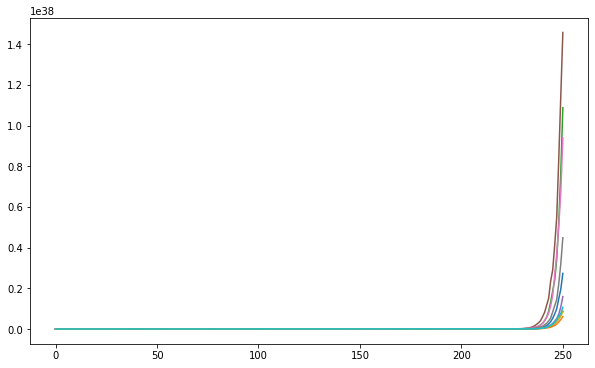

In [18]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10]);

In [19]:
p = np.maximum(S[-1]-110,0)
p

array([2.73307522e+37, 6.11446261e+36, 1.08765046e+38, ...,
       1.54430897e+36, 3.78540224e+37, 6.80603168e+36])

In [20]:
p.shape

(10000,)

In [21]:
C = np.exp(-r*T)*np.sum(p)/iterations
C

3.0012817774346445e+37